In [1]:
# importing notebook containig utility functions for model training
import sys
sys.path.append('utilities/')

from modelZoo import *
from modelTrainingUtility import *

2022-10-19 21:47:15.857884: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:

# input parameters for training not used for testing required for reading the data from the disk
input_params = {
    "input_path": 'tmp/test.npz', # path to load the dataset

    "output_path": 'models/experiment-q/model/', # path to saved model
    "verbose": True,
    "target_byte": 0, # byte for which ranking is to be performed
    "network_type": "cnn2", # choices={'mlp', 'cnn', 'cnn2', 'wang'}
    "start_idx": 1200,
    "end_idx": 2200,
    "verbose": False,
    "testType": "diffkey", # choices={'samekey', 'diffkey'}
}

if not os.path.isdir(input_params["output_path"]):
    print('creating directory for saving results ...')
    os.makedirs(input_params["output_path"])
else:
    print('directory available for saving results.')

directory available for saving results.


In [3]:
# directory for saving model
model_dir = os.path.join(input_params["output_path"], 'model')

# model_file_name = 'best_model_cnn2_dataset_MPEG_target1_targetbyte_{}.hdf5'.format(input_params["target_byte"])
model_file_name = 'best_model_cnn2_dataset_PC1_CB1_TDX1_K0_U_200k_targetbyte_{}.hdf5'.format(input_params["target_byte"])
model_path = os.path.join(input_params["output_path"], 'model')
mode_weights = os.path.join(model_path, model_file_name)
print('model file: ', mode_weights)

mode_weights='m2/best_model_cnn2_dataset_XMEGA_target1_targetbyte_0.hdf5'

model file:  models/experiment-q/model/model/best_model_cnn2_dataset_PC1_CB1_TDX1_K0_U_200k_targetbyte_0.hdf5


In [4]:
# Load profiling and attack data and metadata from the ASCAD database
# val_traces, val_label, val_textin, key
X_attack, Y_attack, plaintext_attack, key = load_test_data_2(input_params)

loading the test data ...
processing data for key byte 0
test data loaded successfully!


In [5]:
# Load model
start_idx, end_idx = input_params["start_idx"], input_params["end_idx"]
input_shape = (end_idx-start_idx, 1)
K.clear_session()

model = cnn_best2(input_shape)

print('loading weights...')
model.load_weights(mode_weights)
print('weights loaded successfully!')

2022-10-19 21:47:19.876908: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-10-19 21:47:19.877353: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-10-19 21:47:19.939615: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-19 21:47:19.941040: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: TITAN RTX computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 23.65GiB deviceMemoryBandwidth: 625.94GiB/s
2022-10-19 21:47:19.941070: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-10-19 21:47:19.943593: I tensorflow/stream_executor/platform/default/dso_load

loading weights...
weights loaded successfully!


In [6]:
# run the accuracy test
score, accuracy = model.evaluate(X_attack, Y_attack, verbose=input_params["verbose"])
print('test accuracy is: {:f}'.format(accuracy))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-10-19 21:47:20.749659: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-10-19 21:47:20.750257: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3600000000 Hz
2022-10-19 21:47:20.906679: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-10-19 21:47:21.022217: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-10-19 21:47:21.581980: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-10-19 21:47:21.625774: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


test accuracy is: 0.003500


In [7]:
# We test the rank over traces of the Attack dataset, with a step of 10 traces
print('start computing rank value...')
min_trace_idx = 0
max_trace_idx = 2000
rank_step = 1
target_byte = input_params["target_byte"]
ranks = full_ranks(model, X_attack, key, plaintext_attack, min_trace_idx, max_trace_idx, target_byte, rank_step)


start computing rank value...
# This is a CNN: reshape the data
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [8]:

# We plot the results
# f_ranks[i] = [t, real_key_rank]
x = [ranks[i][0] for i in range(0, ranks.shape[0])]
y = [ranks[i][1] for i in range(0, ranks.shape[0])]

In [9]:
testType = input_params["testType"]
fig_save_name =  os.path.join(input_params["output_path"], 'xmega-no-opt' + '_rank_performance_byte_{}_{}.png'.format(target_byte, testType))
print('figure save to file: {}'.format(fig_save_name))
model_file_name = os.path.basename(mode_weights).split('.')[0]

figure save to file: models/experiment-q/model/xmega-no-opt_rank_performance_byte_0_diffkey.png


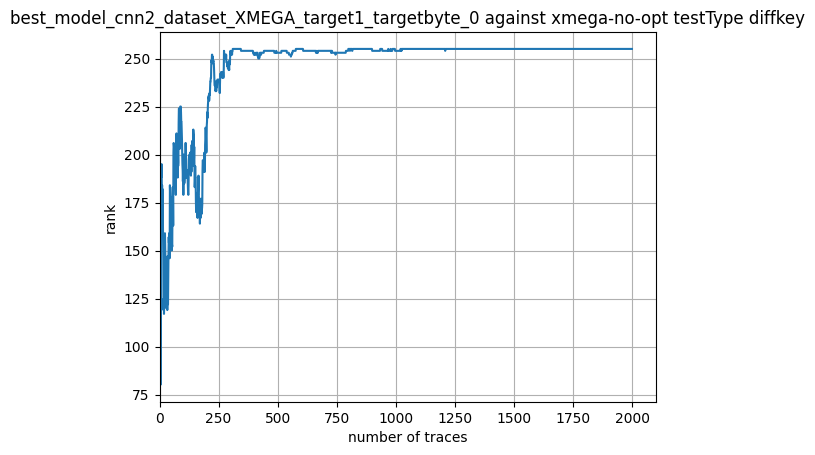

In [10]:
plot_figure(x, y, model_file_name, 'xmega-no-opt', fig_save_name, testType)

In [11]:
import os
os.remove("tmp/test.npz")